<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-2-Challenge" data-toc-modified-id="Week-2-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 2 Challenge</a></span></li><li><span><a href="#Controller-Design:-An-Introduction-to-Timers-and-Rising-Edge-Counters" data-toc-modified-id="Controller-Design:-An-Introduction-to-Timers-and-Rising-Edge-Counters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Controller Design: An Introduction to Timers and Rising Edge Counters</a></span><ul class="toc-item"><li><span><a href="#Timers" data-toc-modified-id="Timers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Timers</a></span></li><li><span><a href="#Rising-Edge-Counters" data-toc-modified-id="Rising-Edge-Counters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rising Edge Counters</a></span></li></ul></li><li><span><a href="#Controller-Validation:-Timers-and-Rising-Edge-Counters-in-the-Boolean-Simulator" data-toc-modified-id="Controller-Validation:-Timers-and-Rising-Edge-Counters-in-the-Boolean-Simulator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Controller Validation: Timers and Rising Edge Counters in the Boolean Simulator</a></span><ul class="toc-item"><li><span><a href="#Timer-Example" data-toc-modified-id="Timer-Example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Timer Example</a></span></li><li><span><a href="#Counter-Example" data-toc-modified-id="Counter-Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Counter Example</a></span></li></ul></li><li><span><a href="#Controller-Validation:-Timers-and-Rising-Edge-Counters-in-Arduino" data-toc-modified-id="Controller-Validation:-Timers-and-Rising-Edge-Counters-in-Arduino-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Controller Validation: Timers and Rising Edge Counters in Arduino</a></span></li></ul></div>

**Important: The cell below this one must be run before the assignments will function.**

In [ ]:
from metakernel import register_ipython_magics
register_ipython_magics()

# Week 2 Challenge

In lab this week, you will be asked to design a controller for your workstation's gate system that will raise the gate for a specificed amount of time, will lower the gate once the time is reached, and then use a sensor to determine if it should close all the way or re-open because the robot has not moved through the gate.
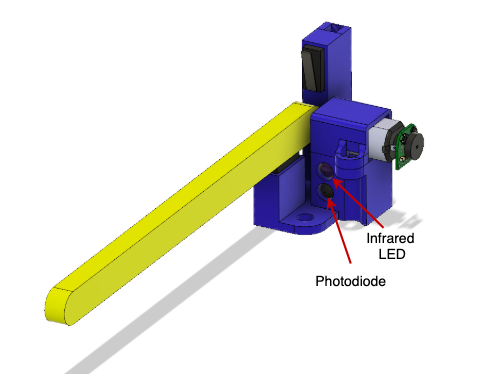

Consider how a state machine operating a system like this one might "know" to hold the gate open for certain amount of time. As an operator, would you like to know what its doing so you know the controller is working properly even though nothing is happening?

Today's notebook is an introduction to the tools commonly used in finite state machine design to facilitate this type of behavior. 





# Controller Design: An Introduction to Timers and Rising Edge Counters



## Timers

In many applications where a FSM is a good choice for high-level program operation, you'll find yourself needing to design your state machines' transitions too use a few common stimuli. For instance: if you need to create a system that "waits" for a specified period of time after a button is pressed, or requires that a button is pressed for a particular length of time to "make sure" that the user meant to enter a particular machine state, you'll likely need to implement (or use) some kind of **timer** so that the stimulus of "wait for a specified amount of time" can be implemented in your state transition diagram and chart. 

Timers are extremely common in finite state machine design. They behave in the following way:

* When the boolean input to the timer is TRUE, the timer counts up (usually in milliseconds).
* When the elapsed time is greater than some threshold, the timer's output variable is set to TRUE. Otherwise it is FALSE.
* When the input to the timer is FALSE, the timer stops counting and the elapsed time is *reset* to zero.

## Rising Edge Counters

A rising edge counter helps a finite state machine keep track of how many times something has happened. This, like a timer, is a common need for designing the stimuli for transitions in FSMs. A standard counter that you might find on an industrial controller has three inputs: an "up input," a "down input," and a "reset input." 

* If the user (or the state transition logic) sets the "up" input true with a *unique rising edge* (was false, now true-- like a button press), an internal variable (integer) in the counter will count up by one. 
* If the using input sets the "down" input to be true with a "unique rising edge",it will bring the count (the counter's "accumulator") down by one. Generally, counters have a minimum value of 0.
* Whenever the "reset" input on the counter is true, the count is resets to zero. 
* When the counter's accumulator reaches a preset value the output variable is set to TRUE.  Otherwise it is FALSE.

# Controller Validation: Timers and Rising Edge Counters in the Boolean Simulator

To see how timers and rising edge counters work, let's validate our understanding of how they function using a simple simulator. Using the ME480 Boolean logic simulator can help you quickly test finite state machine designs you may later use on your ME480 workstation, without involving any hardware.

The Boolean Logic simulator you first saw in [Week 01 C](../W01C_FSM_FourBlock/W1C_FSM_FourBlock.ipynb) (reproduced below) has built-in timers and rising edge counters as described above.  The variables you can access to operate these are explained below.  


| Timer 0 variables      |                                        |
|:-----:|:--------------------------------------:|
|T0_DUR | Timer preset duration                  |
|T0_EN  | Enables the timer when TRUE            |
|T0     | TRUE when elapsed time reaches duration|
|TA0    | Elapsed time in milliseconds           |




|  Counter 0 variables          |                                        |
|:----------:|:--------------------------------------:|
|CT0_CNT     | Counter preset value             |
|CT0_UP      | On transition from FALSE to TRUE, count increases by 1            |
|CT0_DOWN    | On transition from FALSE to TRUE, count decreases by 1            |   
|CT0_RST     | Counter resets when TRUE  |
|CT0         | TRUE when count reaches preset value |
|CTA0        | Current count |

Cut/Paste the following examples to confirm your understanding of how timers and rising edge counters should work in the simulator.

In [ ]:
%%html
<p data-height="1000" data-theme-id="0" data-slug-hash="ZJJgOL" data-default-tab="result" data-user="brownaa" data-embed-version="2" data-pen-title="p5.js Boolean Algebra Program Simulator w/Timers, Counters and touch scaled" class="codepen">See the Pen <a href="https://codepen.io/brownaa/pen/ZJJgOL/">p5.js Boolean Algebra Program Simulator w/Timers, Counters and touch scaled</a> by Alexander Brown (<a href="https://codepen.io/brownaa">@brownaa</a>) on <a href="https://codepen.io">CodePen</a>.</p>
<script async src="https://product
ion-assets.codepen.io/assets/embed/ei.js"></script>

## Timer Example

The code below will enable the the T0 timer when X1 is pressed.  The Y2 light will turn on when the timer reaches the specified time duration. The Y3 light will turn on when the elapsed time has passed 3000 milliseconds.  When the button is released, the timer will reset.

``` javascript
T0_DUR = 1000  //Timer 0 duration in milliseconds

//Block 1
T0_EN = X1

//Block 2

//Block 3

//Block 4
Y1 = T0        //Y1 light true if timer reaches duration
Y2 = TA0>=3000   //Y2 light true if elapsed time reaches 3000
```

## Counter Example

Pressing X1 will cause the counter to increase.  Pressing X2 will cause the counter to decrease.  Pressing X3 will reset the counter. The Y1 will light will turn on when the counter reaches the preset value.  The Y2 light will turn on when the count reaches at least 5.

``` javascript
CT0_CNT = 3 // Counter 0 preset value

//Block 1

//NOTE that HOLDING X1, X2, or X3 DOES NOT continue to increase the count
//The counter only increases/decreases on a transition from FALSE to TRUE
CT0_UP   = X1     
CT0_DOWN = X2
CT0_RST  = X3

//Block 2

//Block 3

//Block 4
Y1 = CT0       //Y1 light true if counter reaches preset
Y2 = CTA0>=5   //Y2 light true if count is at least 5
```

In [ ]:

%%html
<iframe src="https://workbench.lafayette.edu/~brownaa/ME480/plainsim/plainsim.html" width="1200" height="1000"></iframe>



Explore the operation of timers and rising edge counters using the examples above. Paste them into the simulator, modify them, and get a feel for how you might use timers and rising edge counters in state machine designs. Think about how you might use them to tackle the challenge at the top of this notebok (the Lab 2 gate problem). 


While the Boolean Algebra simulator is a powerful tool for you to prototype state machine designs, especially now that you have seen how its built-in timers and counters are used, it is important to be able to use timers and counters on real hardware, like your Lab workstation. To learn how, let's look at how we might implement timers and rising edge counters in the Arduino language.


# Controller Validation: Timers and Rising Edge Counters in Arduino

Industrial controllers like Programmable Logic Controllers (PLCs) and our ME480 boolean logic simulator have built-in timers and rising edge counters, but by default, Arduino based controllers (used in Lab) require that you create them yourself. 

However, the ME480 instructors have created an Arduino Library ([what is that?](https://www.arduino.cc/reference/en/libraries/)) for you that implements the functionality of built-in counters and timers that you can use in your finite state machines. **IMPORTANT!! To learn more about Arduino Libraries, including how to learn to use a library that is new to you, see the [Arduino Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Arduino_Resource.html#Arduino-Libraries) Section on Arduino Libraries.  You will need to read and understand this section in order to complete this week's assignment**.

To validate our understanding of how timers and rising edge counters can be implemented on Arduino, you can use your ME480 workstation. Just be sure to choose the correct "board" type in the Arduino environment, and modify pin numbers in the code as needed.